In [14]:
import numpy as np
import pandas as pd
import numpy.linalg as LA
import operator

In [15]:
def pagerank_vector(graph, initial_state, k, alpha):
    """ compute the PageRank importance vector of the input graph with an initial_state vector, k times of iteration, and damping parameter alpha """
    n = len(initial_state)
    all_ones = np.ones((n, n))
    google_matrix = alpha * graph + (1 - alpha) * ((1 / n) * all_ones)
    pagerank = initial_state
    for i in range(k):
        pagerank = google_matrix @ pagerank
    #pagerank = eigenvector_scaled(google_matrix)
    #pagerank can also be computed by computing the scaled eigenvector
    return pagerank

In [16]:
def to_dict(PATH):
    """ compute data in file to a linked dictionary and also returns all values in the dictionary """
    dictionary = dict()
    all_values = set()
    with open(PATH, encoding = "utf-8") as file:
        headline = file.readline() # delete it if there is no need to pull out the first line
        for line in file:
            x, y  = line.strip().split(",")
            x_links = dictionary.setdefault(x, set())
            y_links = dictionary.setdefault(y, set())
            x_links.add(y)
            all_values.add(x)
            all_values.add(y)
    all_values = list(all_values)
    all_values.sort()
    return dictionary, all_values

In [17]:
def to_hyperlink_matrix(dictionary, all_values):
    """ compute the input dictionary to a hyperlink matrix H and matrix A """
    length = len(all_values)
    H = np.zeros((length, length))
    A = np.zeros((length, length))
    for key, value in dictionary.items():
        if len(value) > 0:
            n = 1/len(value)
            index1 = all_values.index(key)
            for each in value:
                index2 = all_values.index(each)
                H[index2, index1] = n
        elif len(value) == 0:
            index = all_values.index(key)
            A[:,index] = 1/length
    return H, A

#test
#a = {'A': {'B', 'C', 'D'}, 'B': {}, 'C': {'D'}, 'D': {'A', 'B'}}
#c = ['A','B','C','D']
#b, d= to_hyperlink_matrix(a,c)
#b, d

In [18]:
def eigenvector_scaled(matrix):
    """ compute the eigenvector of the given matrix with all entries sum to 1 """
    eigval, eigvec = LA.eig(matrix)
    for i in range(len(eigval)):
        if np.isclose(eigval[i], 1):
            sum = 0
            for j in eigvec[:,i]:
                sum += j
            eigvec_scaled = 1/sum * eigvec[:,i]
    return eigvec_scaled

#test
#a = np.array([[0,1/2],[1,1/2]])
#I = eigen_vector_scaled(a)
#I.sum()

In [19]:
#compute the csv file to a dictionary 
#PATH = "C:/Brandeis/internet.csv"
PATH = "internet.csv"
internet, all_links = to_dict(PATH)
H, A = to_hyperlink_matrix(internet, all_links)
S = H + A
n = len(all_links)
I_initial = np.zeros((n, 1))
I_initial[:] = 1 / n
k = 100 #can be changed
alpha = 0.85 #can be changed

I = pagerank_vector(S, I_initial, k, alpha)

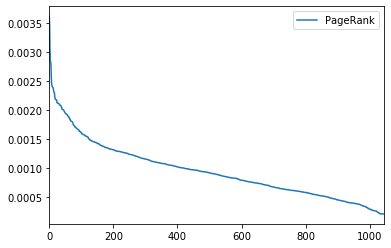

In [20]:
rank = dict()
for i in range(n):
    rank[all_links[i]] = I[i,0]
sorted_rank = dict(sorted(rank.items(), key=operator.itemgetter(1),reverse=True))
website = list(sorted_rank.keys())
related_rank = list(sorted_rank.values())
df = pd.DataFrame(list(zip(website, related_rank)), columns =['Website', 'PageRank'])
df.plot.line(y = 'PageRank')

In [22]:
target_source = df[df['PageRank'] <= 0.0005]
target_website = target_source['Website'].values.tolist()
brandeis_final = dict()
length1 = len(target_website)
brandeis = 'brandeis.edu'
brandeis_index = all_links.index(brandeis)
pagerank_before = I[brandeis_index, 0]
index = 0
max_difference = 0
for i in range(length1):
    new_internet, all_links = to_dict(PATH)
    new_internet[target_website[i]].add(brandeis) #a set cannot add duplicate values
    H1, A1 = to_hyperlink_matrix(new_internet, all_links)
    S1 = H1 + A1
    I1 = pagerank_vector(S1, I_initial, k, alpha)
    pagerank_after = I1[brandeis_index, 0]
    brandeis_final[target_website[i]] = pagerank_after
    difference = pagerank_after - pagerank_before
    if difference > max_difference:
        max_difference = difference
        index = i

print(max_difference)
print(target_website[index])

0.0004003416562689923
pace.edu
